In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/smart_grid_stability_augmented.csv')

In [ ]:
dataset.replace({'stabf': {'unstable':0, 'stable':1}}, inplace=True)

In [ ]:
dataset.drop(columns=['stab'])

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [ ]:
# split the data into inputs and outputs
features = dataset.iloc[:, :12].values
labels = dataset.iloc[:,-1].values

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split

# train-test split
X_train= features[0:len(features)-1000]
y_train=labels[0:len(labels)-1000]

X_test= features[len(features)-1000:len(features)]
y_test=labels[len(labels)-1000:len(labels)]

In [ ]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# importing classifier
from sklearn.linear_model import LogisticRegression

# initializaing the LR
logreg = LogisticRegression()

# training the model
logreg.fit(X_train, y_train)

# testing the model
y_pred = logreg.predict(X_test)


In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.8


In [ ]:
# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

           1     0.7558    0.6915    0.7222       376
           0     0.8232    0.8654    0.8437       624

    accuracy                         0.8000      1000
   macro avg     0.7895    0.7784    0.7830      1000
weighted avg     0.7978    0.8000    0.7981      1000



[Text(0, 0.5, 'STABLE'), Text(0, 1.5, 'UNSTABLE')]

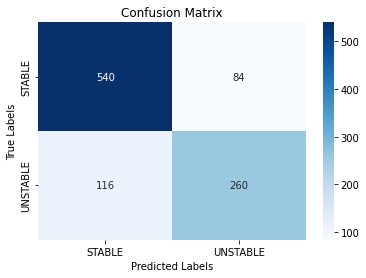

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred, labels=[1,0], digits=4))       
cm_LR = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm_LR, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
        
ax.xaxis.set_ticklabels(['STABLE', 'UNSTABLE'])
ax.yaxis.set_ticklabels(['STABLE', 'UNSTABLE'])